# Training Mobile-Ready models using TensorFlow Lite

## Introduction

We can use `arcgis.learn` to train deep learning models that can be deployed on mobile devices using ArcGIS field apps. This enables AI on the edge and the simplification of field workers' jobs. This is done using TensorFlow which enables us to save trained models to '.tflite' format. A few applications involved in this workflow are 
- Assisted intelligent survey
- Disconnected Decision support
- Automatic feature extraction from street view
- Automated Rapid data collection on the move


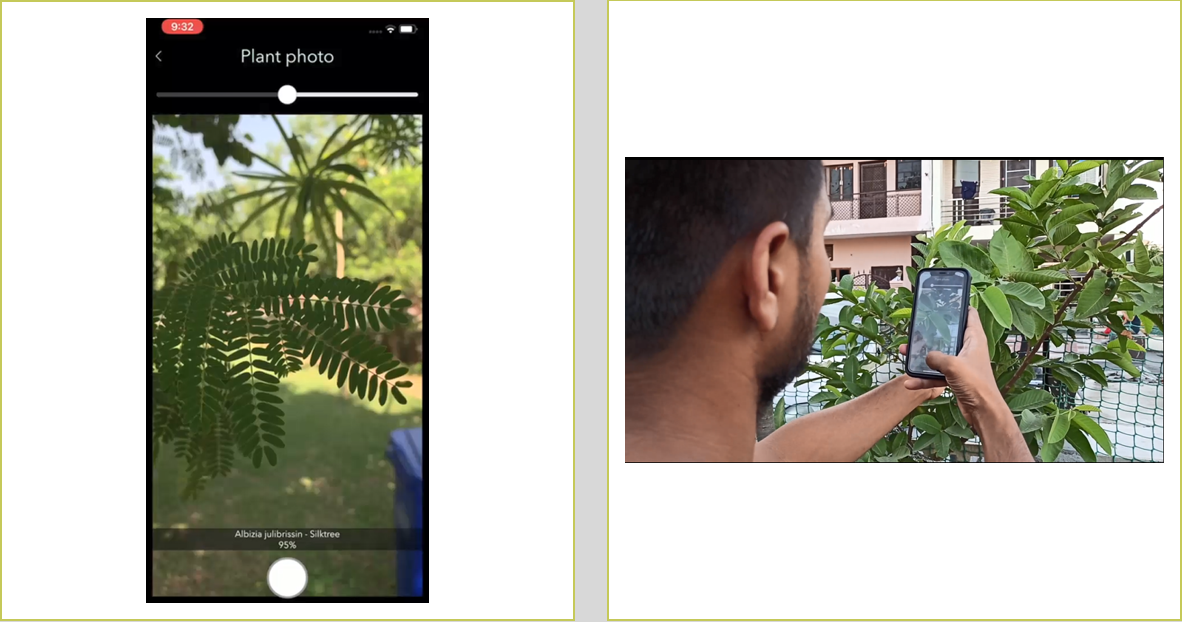

<center>Survey123 application in action</center>

 In this guide we are going to use street view images from the ESRI campus. We have labeled a few fire hydrants using [labelImg](https://github.com/tzutalin/labelImg). This is an object detection exercise and requires an object detection model to be trained. 
 
 We will be training a SingleShotDetector model in this guide. SingleShotDetector like other common object detection models wil predict the class of the objects along with their location (bounding box) in an image. Learn more about SingleShotDetector [here](https://developers.arcgis.com/python/guide/how-ssd-works/).

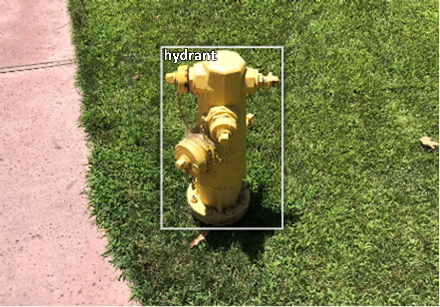

## Prerequisites

- This workflow builds on the basic workflow followed to train deep learning models with `arcgis.learn` module. It is recommended to have first readt the basic workflow [here](https://developers.arcgis.com/python/guide/geospatial-deep-learning/) if you hvae not done so previously. 
- To train mobile-ready light models, the [**TensorFlow**](https://www.tensorflow.org/) library needs to be installed in addition to fastai and PyTorch. Please refer to the section "Install deep learning dependencies of arcgis.learn module" [on this page](https://developers.arcgis.com/python/guide/install-and-set-up/#Install-deep-learning-dependencies-for-arcgis.learn-module) for detailed documentation on the installation of these dependencies.


## About TensorFlow Lite

Deep learning algorithms are generally compute-intensive and specialized hardware like GPUs are always recommended in deep learning workflows. This makes deployment of deep learning models on mobile a challenging task. 

TensorFlow Lite is a lightweight solution to this problem. It reduces the overall compute requirement and size of the model making it easy to ship on mobile devices. It also supports hardware acceleration that inturn enables low-latency inferencing on mobile devices, which allows us to build real-time applications on top of it. Learn more about TensorFlow Lite [here](https://www.tensorflow.org/lite/) 

With argis.learn we can export out models to TensorFlow Lite format '.tflite', which can be easily deployed on mobile with ArcGIS field apps. Check the [deployment section](#Deployment) of this guide for more details on deployment.  

## Supported Models

Currently, we support three common deep learning workflows for training models that can be used on mobile. Here are the three models along with their application that can be trained for mobile devices:
- **FeatureClassifier** - Image Classification
- **SingleShotDetector** - Object Detection
- **UnetClassifier** - Pixel Classification

## Set Environment Variables

This is an **important** step and has to be run in the first cell of the notebook before any imports are made. By default arcgis.learn only works on a PyTorch backend. Setting this environment variable enables the TensorFlow backend as well, which is required to train a TensorFlow Lite model.

In [1]:
%env ARCGIS_ENABLE_TF_BACKEND=1

env: ARCGIS_ENABLE_TF_BACKEND=1


## Imports

In [2]:
from arcgis.learn import prepare_data, SingleShotDetector

## Data preparation

In [3]:
data = prepare_data(
    'Esri Campus Street view',
    dataset_type='PASCAL_VOC_rectangles',
    batch_size=16
)

## Visualize Training data

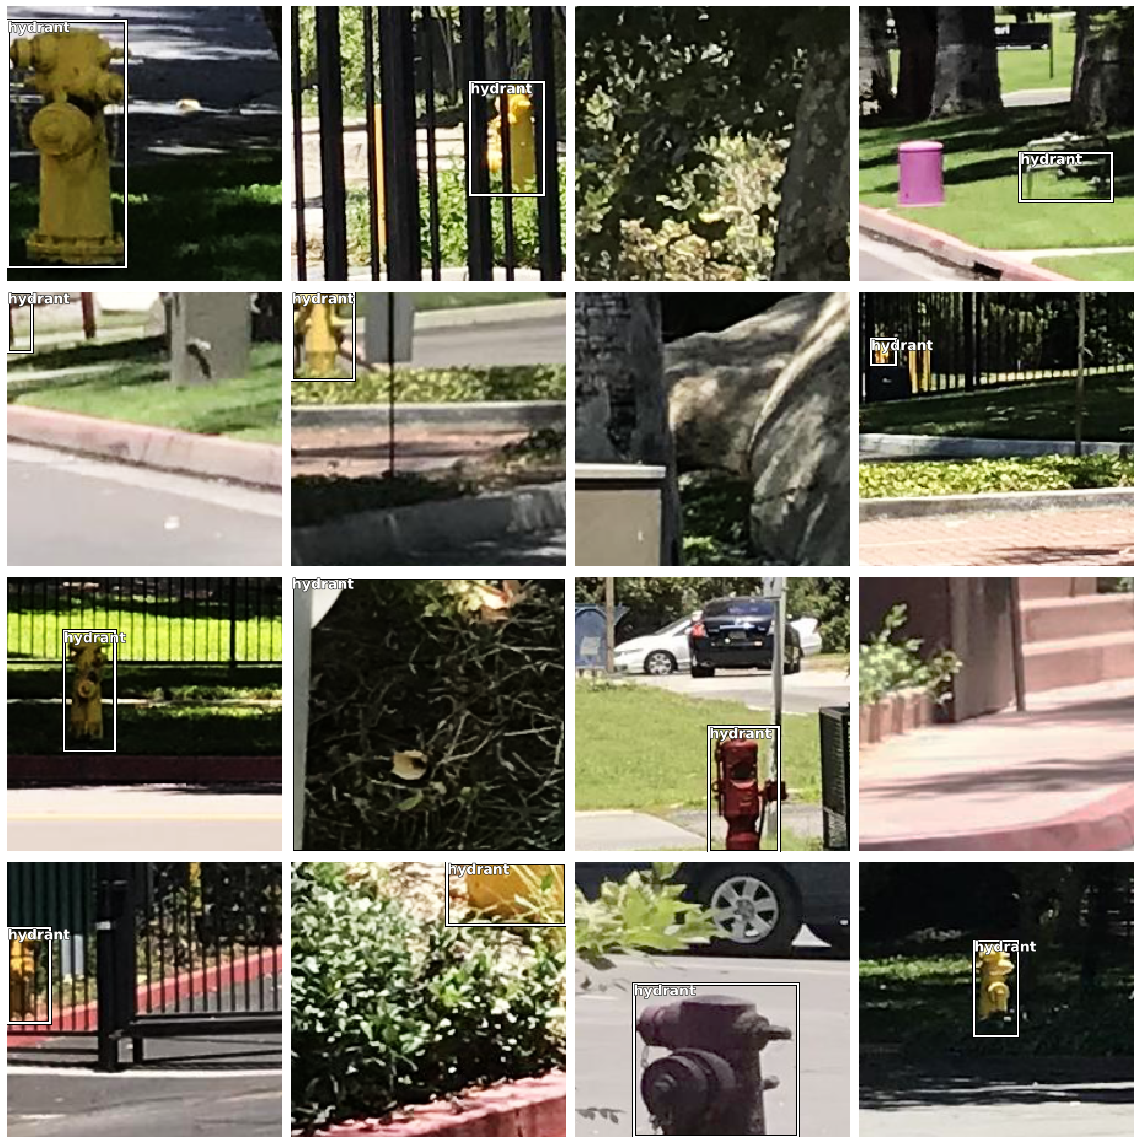

In [4]:
data.show_batch()

## Train Model

### Model instantiation options


 - `backbone`: Make sure you pick a mobile optimized backbone, currently we only support 'MobileNetV2' backbone.
 - `backend`: **Important !**, Make sure you select the backend as 'tensorflow' to enable saving the model to '.tflite' format.

In [4]:
model = SingleShotDetector(data, backbone='MobileNetV2', backend='tensorflow')

We will now find an appropriate learning rate using the `{model}.lr_find()` method.

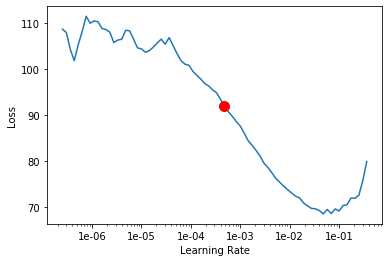

0.0004786301

In [9]:
model.lr_find()

We will now train the model by calling the `{model}.fit()` method.

In [10]:
model.fit(10, .001)

Once our model has been fitted for the specified epochs, we can visualize a few sample predictions from the model using the `{model}.show_results()` method.

## Visualizing a few results 

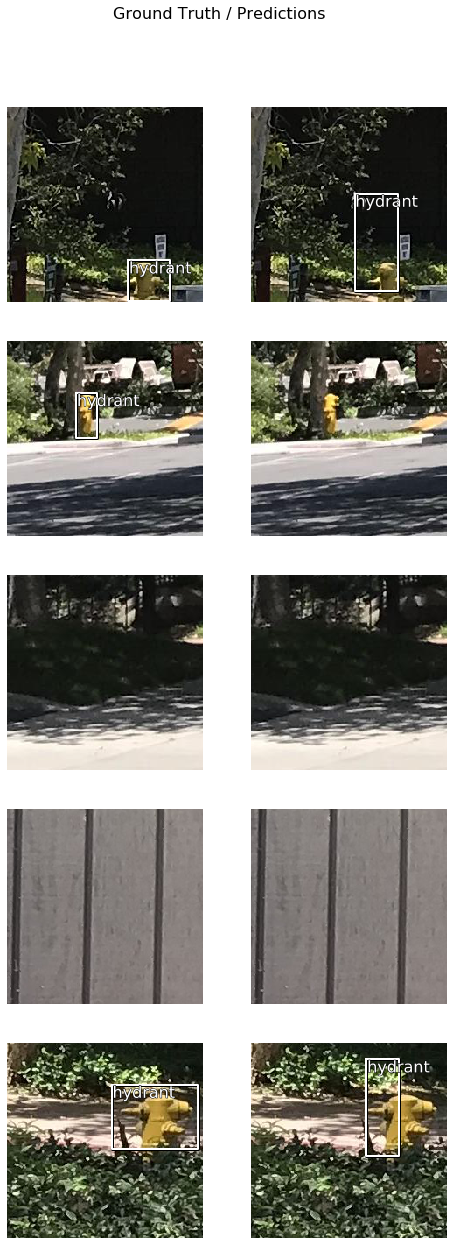

In [10]:
model.show_results(thresh=0.5)

## Save Model to an intermediate format 

We can use the `{model}.save()` method to save the model to 'keras_saved_model' format, this format can be used to save and load intermediate models in the training workflow. 

Note: **Important!** This format is not directly deployable on mobile devices and needs to be exported to mobile ready format as explained in [this step](#Exporting-model-to-mobile-ready-format). 

In [12]:
model.save('10e')

WindowsPath('Esri Campus Street view/models/10e')

## Load a model and train it further

If you want to load a model saved to an intermediate format explained [here](#Save-Model-to-an-intermediate-format) you can use the `{model}.load()` method.

Note: **Important !** Models saved in tflite format explained [here](#Exporting-model-to-mobile-ready-format) cannot be loaded back and trained further as it is an export only format.

In [6]:
# model.load('10e')

## Exporting model to mobile ready format

We will now save the model we just trained to a format supported by ESRI Field Apps. Right now the only supported format is 'tflite', and it is required to set the parameter 'framework' to 'tflite' while calling the `{model}.save()` method.

Note: **Important!** This is an export only format, and once exported the output cannot be loaded back to the training workflow and fine-tuned again. To save checkpoints or reusable models that can be loaded back, you need to save the model to an intermediate format as explained [here](#Save-Model-to-an-intermediate-format).

In [11]:
model.save('10e_tflite', framework="tflite")

WindowsPath('Esri Campus Street view/models/10e_tflite')

## Deployment

The tflite model can now be deployed on mobile devices. Survey123 for ArcGIS has an upcoming feature that integrates such tflite models. To learn more on deploying this model in Survey123, join the [Early Adopter Community](https://www.esri.com/en-us/early-adopter) to access the Survey123 private beta.